## **Objective: Mobile Price Classification**

# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
font = {'size'   : 14}
plt.rc('font', **font)
warnings.filterwarnings("ignore")

# Importing the Datasets

In [4]:
df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
x = df.iloc[:,0:20]
y = df.iloc[:,20]
pd.set_option('display.max_columns', None)


# Inspecting the training dataset

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Inspecting the Test Dataset

In [7]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


#Attributes
Here are attributes of our dataset:

id: ID

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of
0 (low cost),
1 (budgeted),
2 (medium cost)
3 (flagship)

## Data Pre-processing

Checking the missing values in our dataset

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Information about our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#Summary statistics of the training dataset

In [10]:
descrip=df.describe()  
#Summary statistics of the test dataset
descrip_test=test_df.describe()  
pd.DataFrame(data = descrip)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#Description of the testing data

In [11]:
pd.DataFrame(data = descrip_test)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


Text(0.5, 1.0, 'Correlation of Attirubtues')

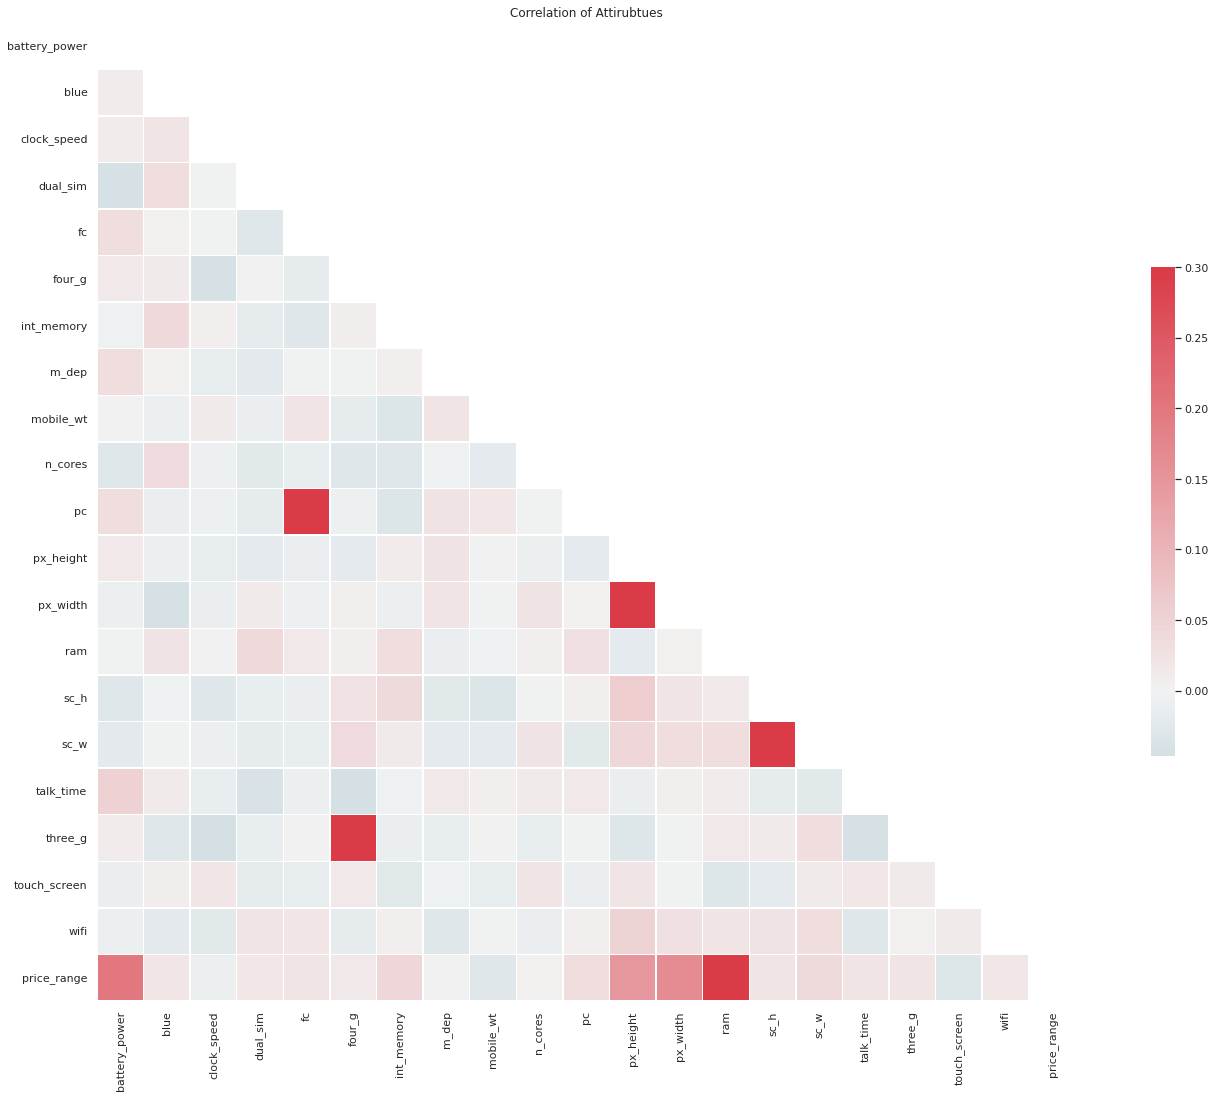

In [12]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

Here, we can see that the following have high correlation with each other:

pc and fc

three_g and four_g

px_width and px_height

------------>Outlier Analysis of Non-Categorical Data<------------



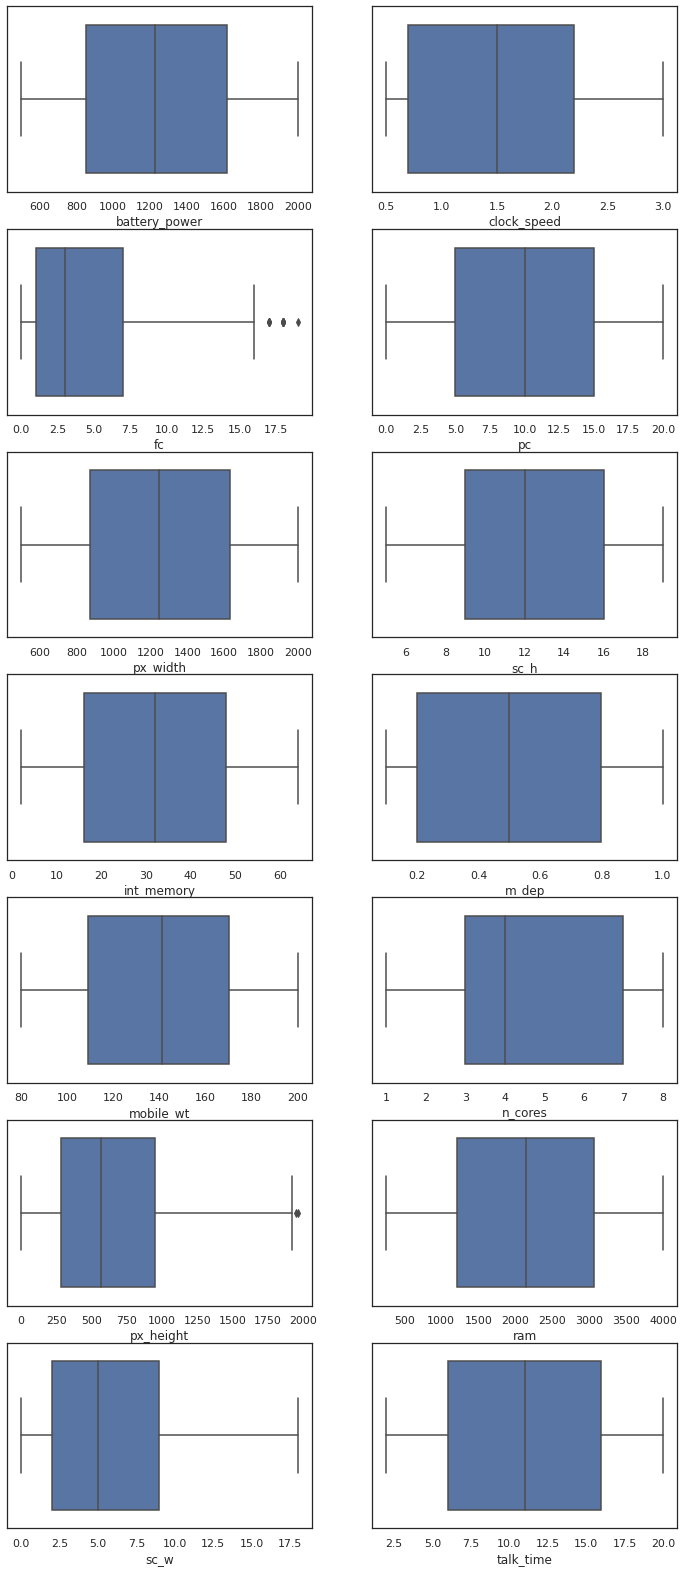

In [13]:
print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['px_width'],ax=ax[2,0])
sns.boxplot(x=df['sc_h'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['px_height'],ax=ax[5,0])
sns.boxplot(x=df['ram'],ax=ax[5,1])
sns.boxplot(x=df['sc_w'],ax=ax[6,0])
sns.boxplot(x=df['talk_time'],ax=ax[6,1])

There are a few outliers in fc and px_height only.

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

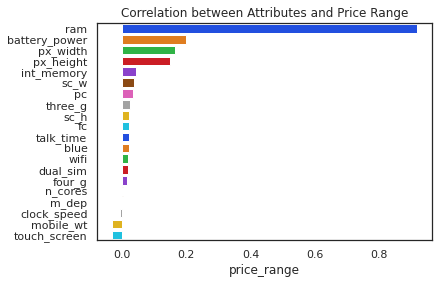

In [14]:
#we are not considering the correlations between X features among themselves
corr = df.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

#Data visualization drawing histogram

------------>Analysis of Attributes<------------



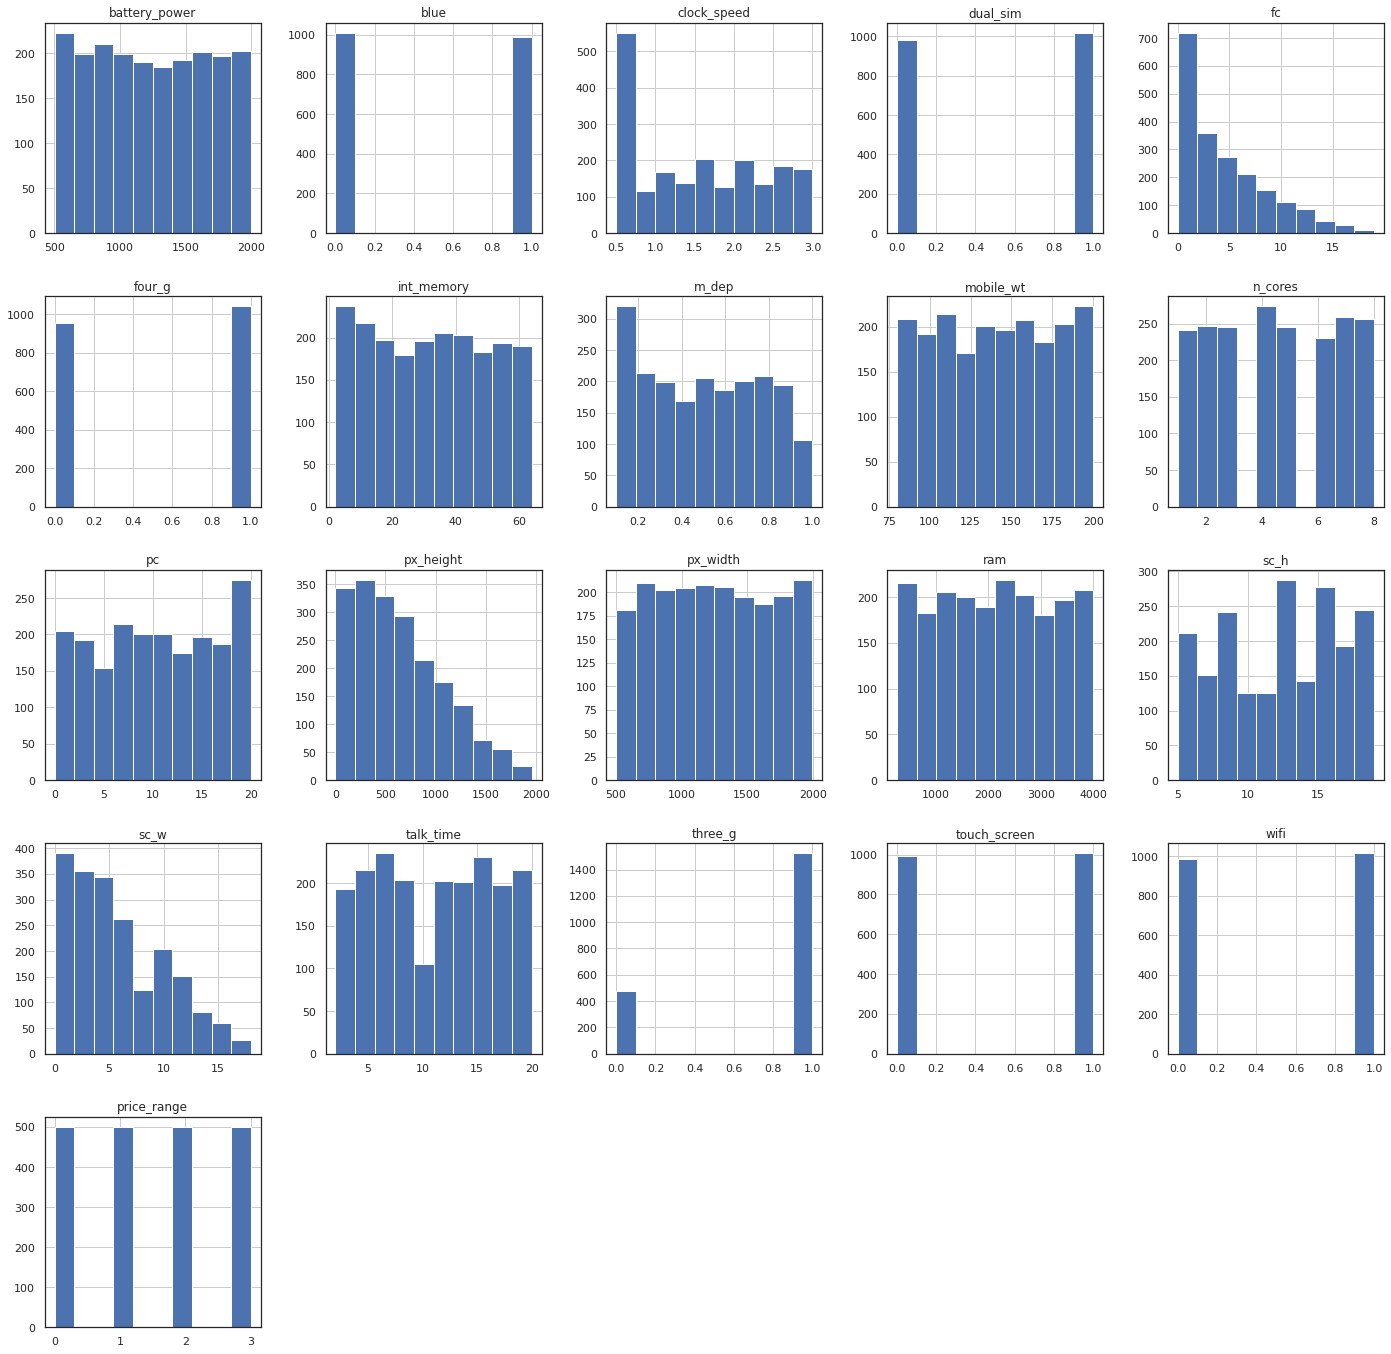

In [15]:

print("------------>Analysis of Attributes<------------")
print()
df.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

#Splitting the training and testing data

In [16]:
from sklearn.model_selection import train_test_split
# Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)

#Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = df.iloc[:,:20].columns
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

##Implementation of Machine Learning Algorithms
To predict the mobile phone price, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

1.Decision tree(gini)

2.Decision tree(entropy)

3.Random forest

4.KNN

5.Naive Bayes

##Using Decision Tree

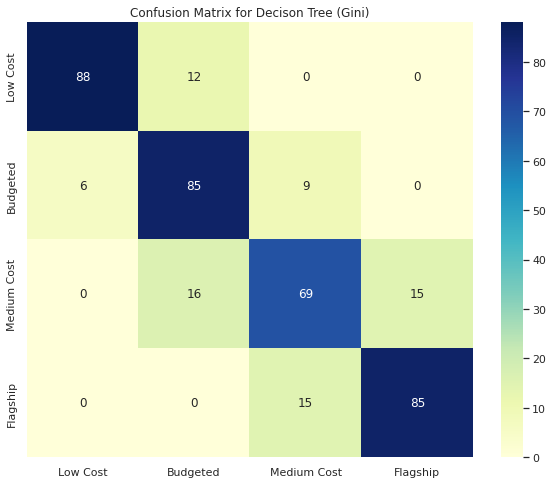

Text(0.5, 1.0, 'Visualizing Important Features for Decision Tree(Gini)')

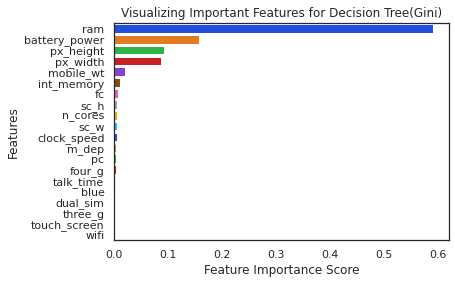

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(random_state=101)
dtg.fit(x_train, y_train)
y_pred_dtg = dtg.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dtg)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Decison Tree (Gini)")
plt.show()
#Calculate Accuracy
acc_dtg = accuracy_score(y_valid, y_pred_dtg)
#Features Contribution
feature_imp = pd.Series(dtg.feature_importances_, index = col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Decision Tree(Gini)")

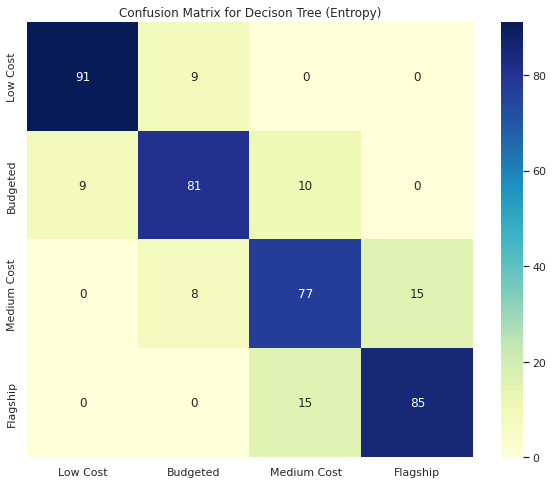

Text(0.5, 1.0, 'Visualizing Important Features for Decision Tree(Entropy)')

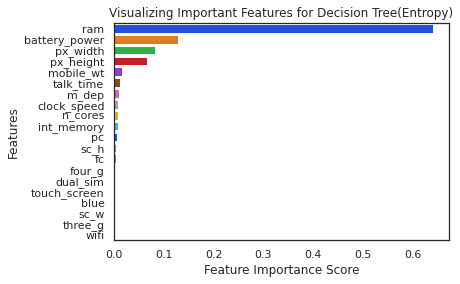

In [19]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(criterion= "entropy",random_state=101)
dte.fit(x_train, y_train)
y_pred_dte = dte.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_dte)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Decison Tree (Entropy)")
plt.show()
#Calculate Accuracy
acc_dte = accuracy_score(y_valid, y_pred_dte)
#Features Contribution
feature_imp= pd.Series(dte.feature_importances_ , index =col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Decision Tree(Entropy)")

##Using Random Forest

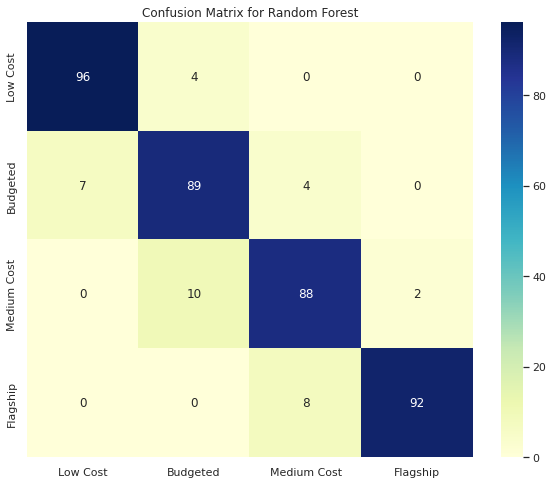

0.9125


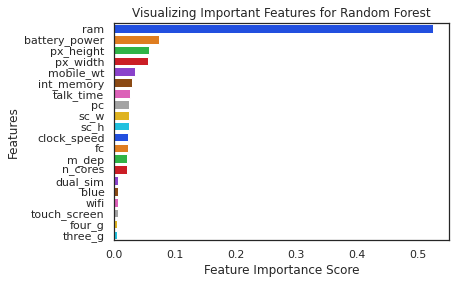

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True) 
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_rf)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Random Forest")
plt.show()
#Calculate Accuracy
acc_rf = accuracy_score(y_valid, y_pred_rf)
#Features Contribution
feature_imp = pd.Series(rf.feature_importances_,index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest")
print(acc_rf)

## Using KNN

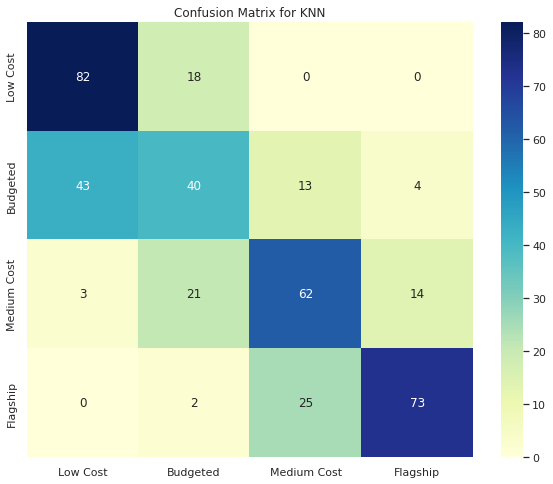

0.6425


In [35]:
from sklearn.neighbors import KNeighborsClassifier  
# Finding optimal KNN Grid Search Method
from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()

#Printing optimal n-neighbors
#parameters = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier(n_neighbors=45)  
#model = GridSearchCV(knn, parameters, cv=5)
#model.fit(x_train, y_train)
#print(model.best_params_)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_knn)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for KNN")
plt.show()
#Calculate Accuracy
acc_knn = accuracy_score(y_valid, y_pred_knn)
print(acc_knn)

## Naive Bayes

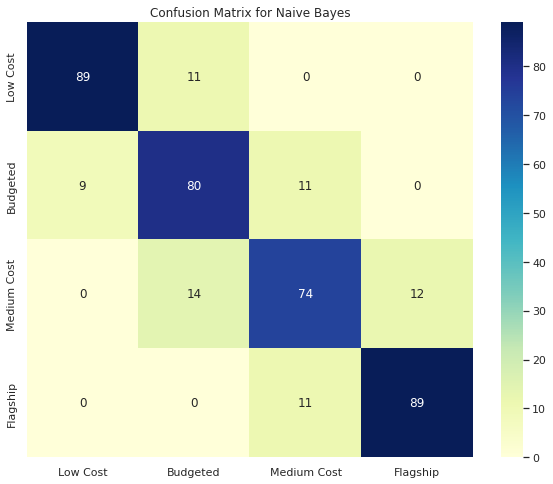

0.83


In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_nb)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()
#Calculate Accuracy
acc_nb = accuracy_score(y_valid, y_pred_nb)
print(acc_nb)

##Accuracy Comparison

In [23]:
models = ['DTG','DTE','RF','KNN','NB']
acc_scores = [acc_dtg,acc_dte,acc_rf,acc_knn,acc_nb]
print("Models\tAccuracy\n")
for i in range(5):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')


Models	Accuracy

DTG	0.8175
DTE	0.835
RF	0.9125
KNN	0.6425
NB	0.83


##Finding the Best Algorithm

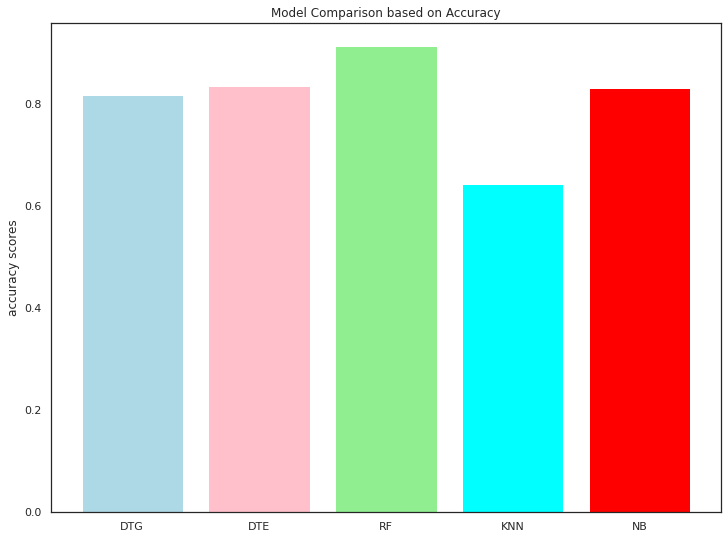

In [24]:
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

We find that Random Forest is the best algorithm